In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df1=pd.read_csv(r"C:\Users\admin\Downloads\titanic\gender_submission.csv")

In [3]:
df2=pd.read_csv(r"C:\Users\admin\Downloads\titanic\test.csv") #test

In [4]:
df3=pd.read_csv(r"C:\Users\admin\Downloads\titanic\train.csv")

In [5]:
#df=pd.merge(pd.merge(df1, df2, on="SibSp"), df3 ,on="SibSp")
'''import dask.dataframe as dd

ddf1 = dd.from_pandas(df1, npartitions=10)
ddf2 = dd.from_pandas(df2, npartitions=10)
ddf3 = dd.from_pandas(df3, npartitions=10)

merged_ddf = ddf1.merge(ddf2, on="SibSp").merge(ddf3, on="SibSp")

merged_df = merged_ddf'''

'import dask.dataframe as dd\n\nddf1 = dd.from_pandas(df1, npartitions=10)\nddf2 = dd.from_pandas(df2, npartitions=10)\nddf3 = dd.from_pandas(df3, npartitions=10)\n\nmerged_ddf = ddf1.merge(ddf2, on="SibSp").merge(ddf3, on="SibSp")\n\nmerged_df = merged_ddf'

In [6]:
df3.shape

(891, 12)

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning:
   **Handling Missing Values:**,
   **Dealing with Categorical Data**,
   **Removing Irrelevant Information**,
   **Standardization/Normalization**,
   **Removing outliers:**


In [8]:
df3.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df3.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df3[df3.duplicated].sum()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [11]:
df3["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [12]:
#df=pd.merge(df1,df4,how="inner",left_on="Survived",right_on="SibSp")

In [13]:
df3.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
df3["Cabin"]=df3["Cabin"].fillna(df3["Cabin"].mode())

In [15]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [16]:
df3.drop(["Cabin"],axis=1,inplace=True)

In [17]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
df3["Age"]=df3["Age"].fillna(df3["Age"].mean())


In [19]:
df3["Embarked"].fillna(df3["Embarked"].mode(),inplace=True)

In [20]:
#df3.dropna()

In [21]:
df3["Embarked"]=df3["Embarked"].fillna("C")

In [22]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

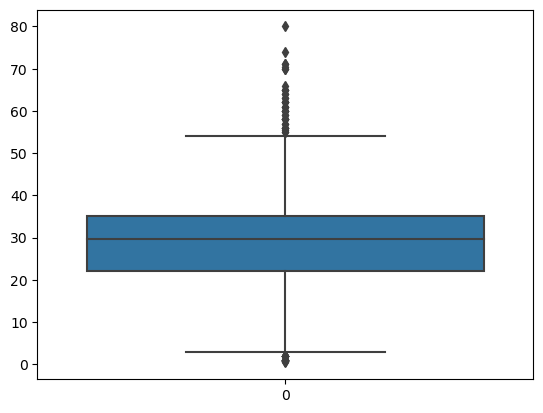

In [24]:
sns.boxplot(df3['Age'])

In [25]:
df3["Age"].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

## Exploratory Data Analysis (EDA):
   **Descriptive Statistics**,
   **Data Visualization**,
   **Categorical Data Analysis:**,
   **Time Series Analysis (if applicable):**
    

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

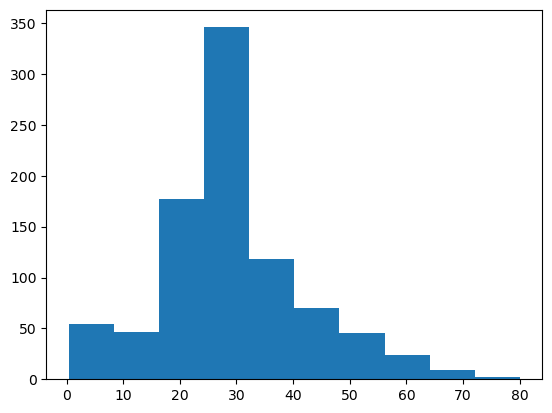

In [26]:
plt.hist(df3["Age"])

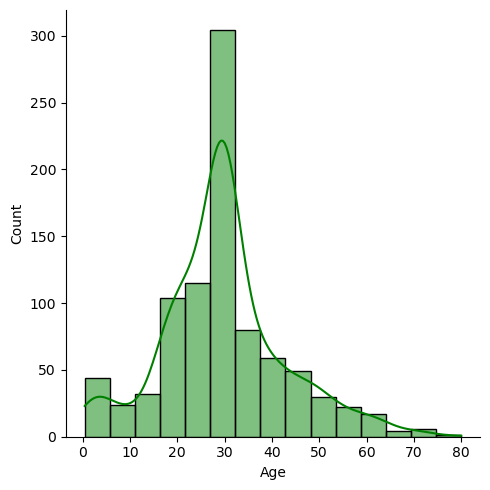

In [27]:
sns.displot(df3["Age"],kde=True,color="green",bins=15)

<Axes: xlabel='Sex', ylabel='Fare'>

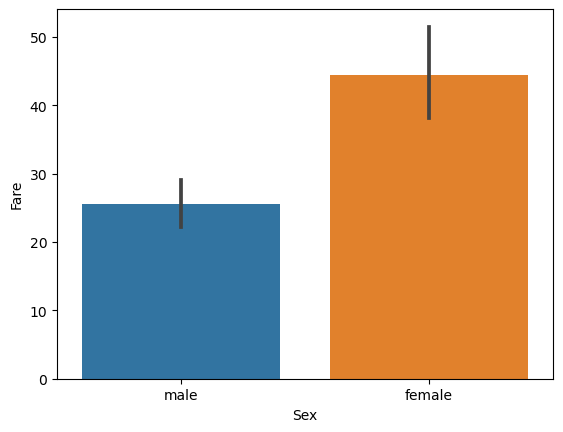

In [28]:
sns.barplot(x="Sex",y="Fare",data=df3)

<Axes: xlabel='Age', ylabel='Fare'>

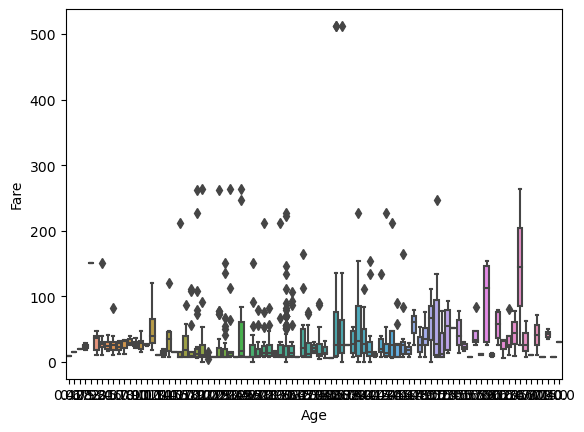

In [29]:

sns.boxplot(x="Age",y="Fare",data=df3)

In [30]:
df3.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


Text(0.5, 1.0, 'Passanger class distribution:-Survived Passenger')

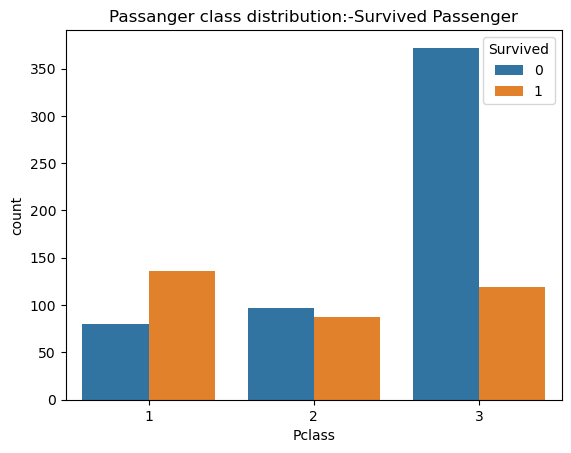

In [31]:
sns.countplot(x="Pclass",hue="Survived",data=df3)
plt.title("Passanger class distribution:-Survived Passenger")

<Axes: xlabel='Pclass', ylabel='Age'>

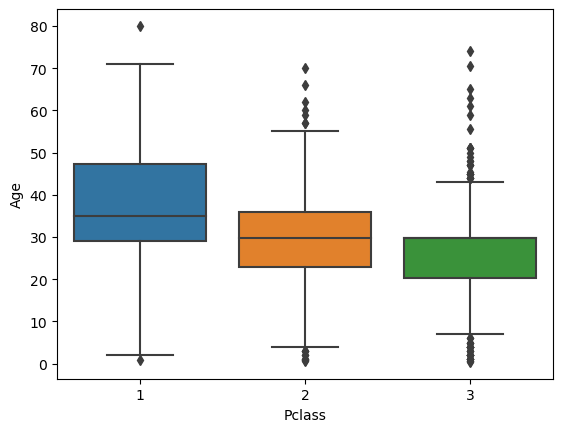

In [32]:
sns.boxplot(y="Age",x="Pclass",data=df3)

<Axes: >

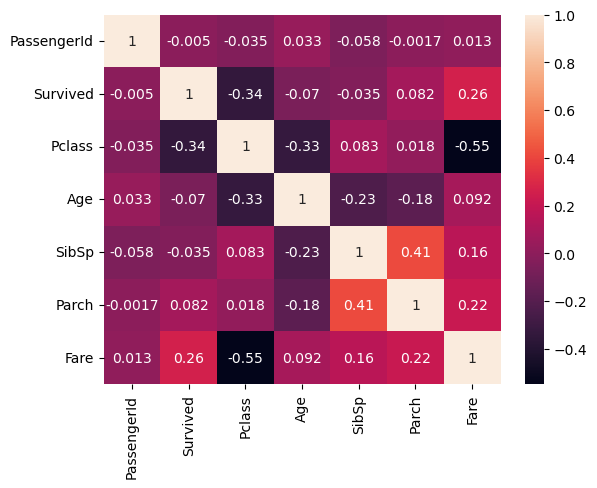

In [33]:
sns.heatmap(df3.corr(), annot=True)

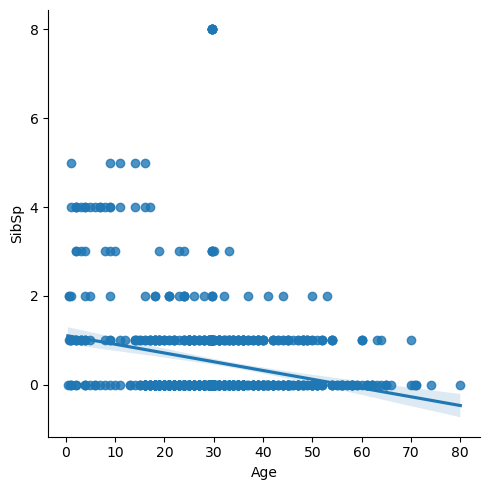

In [34]:
sns.lmplot(x="Age",y="SibSp",data=df3)

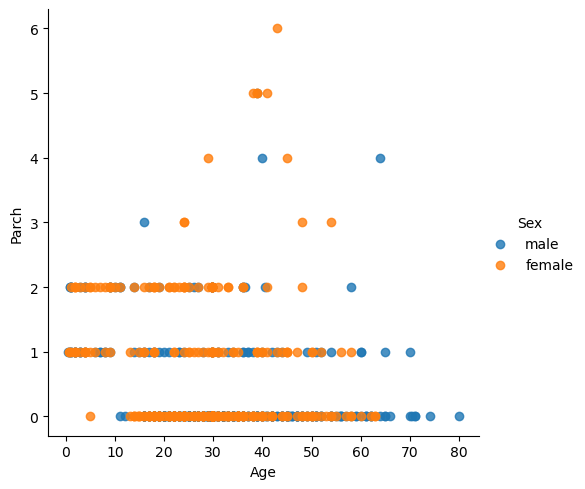

In [35]:
sns.lmplot(x='Age',y="Parch", data=df3, hue="Sex",fit_reg=False)

<Axes: xlabel='Age', ylabel='Fare'>

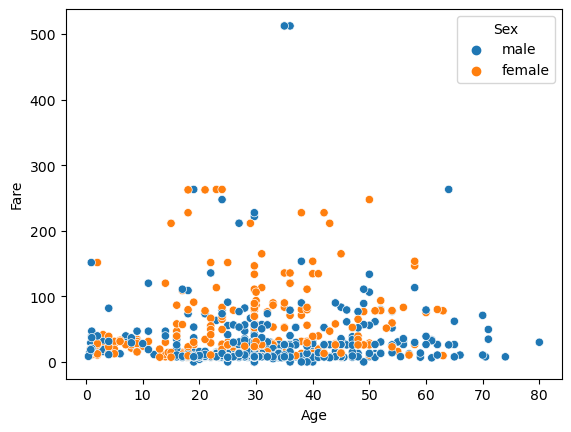

In [36]:
sns.scatterplot(x="Age",y="Fare",data=df3,hue="Sex")

## Relationships between Variables

   **Age and survival:**                                                                                                   
    **Fare and survival:**                                                                                                 
    **Sex and survival:**                                                                                                   
    **Class and survival:**                                                                                                 
   



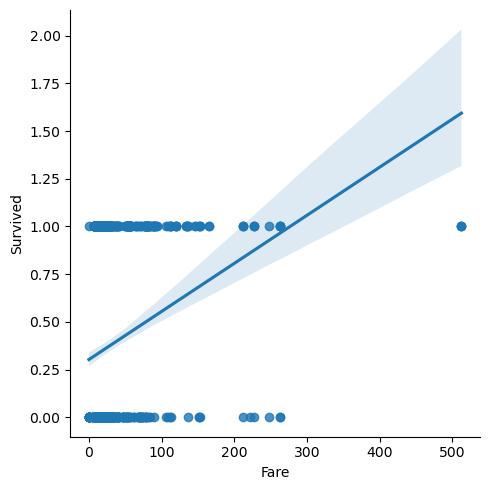

In [37]:
sns.lmplot(x="Fare",y="Survived",data=df3)

<Axes: xlabel='Age', ylabel='Survived'>

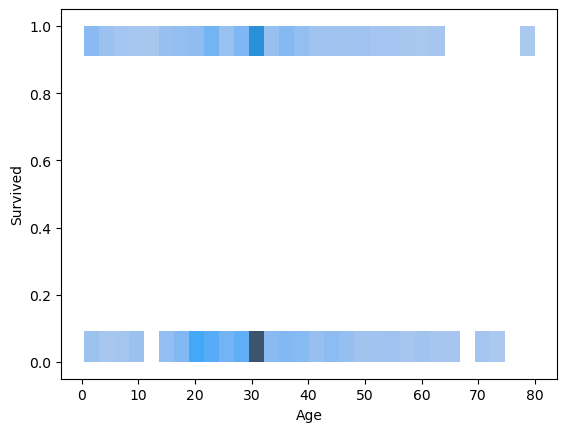

In [38]:
sns.histplot(x="Age",y="Survived",data=df3)

In [39]:
df3.groupby(["Sex","Pclass"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.141405  0.553191  0.457447   
       2        443.105263  0.921053  28.748661  0.486842  0.605263   
       3        399.729167  0.500000  24.068493  0.895833  0.798611   
male   1        455.729508  0.368852  39.287717  0.311475  0.278689   
       2        447.962963  0.157407  30.653908  0.342593  0.222222   
       3        455.515850  0.135447  27.372153  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

<Axes: xlabel='Pclass', ylabel='count'>

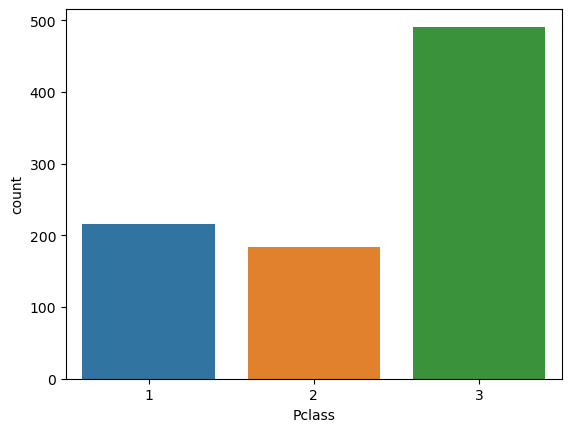

In [40]:
#count of class
sns.countplot(x="Pclass",data=df3)

Text(0.5, 1.0, 'Passanger Class distribution of Survived')

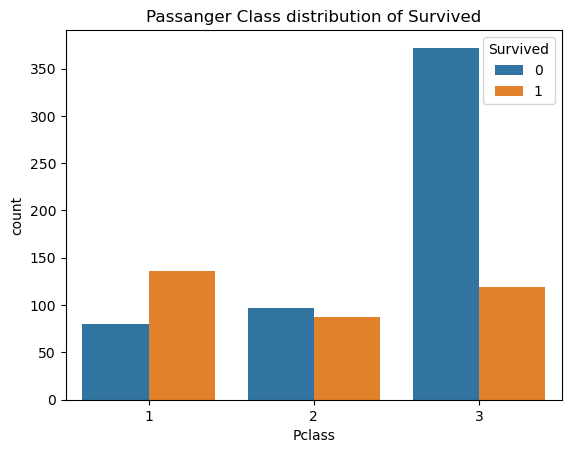

In [41]:
sns.countplot(x="Pclass",hue="Survived",data=df3)
plt.title("Passanger Class distribution of Survived")

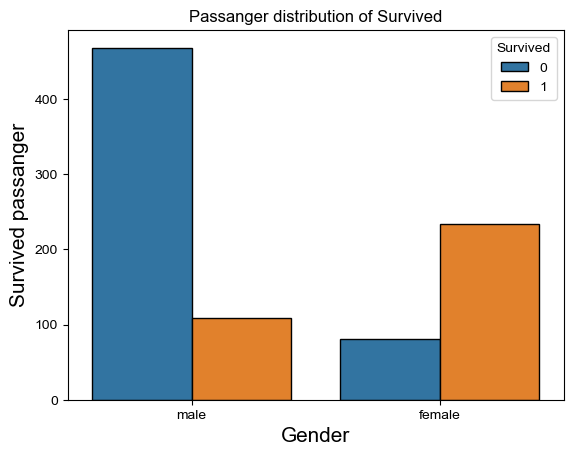

In [42]:
sns.countplot(x="Sex",data=df3,hue="Survived",edgecolor=(0,0,0),linewidth=1)
plt.title("Passanger distribution of Survived")
plt.ylabel("Survived passanger",fontsize=15)
plt.xlabel("Gender",fontsize=15)
sns.set(style="darkgrid")


In [43]:

df3.groupby(["Sex"]).mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [44]:
df3[df3["Age"]<18].groupby(["Sex","Pclass"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

<Axes: xlabel='Age', ylabel='Survived'>

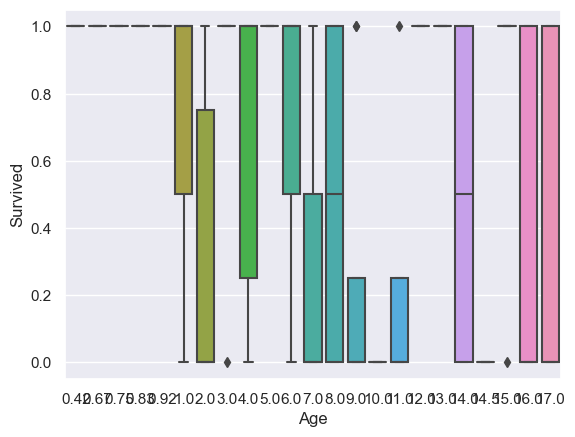

In [45]:
x=df3[df3["Age"]<18]
sns.boxplot(x="Age",y="Survived",data=x)

In [46]:
df3["Ticket"].count()

891

Text(0.5, 1.0, 'Class')

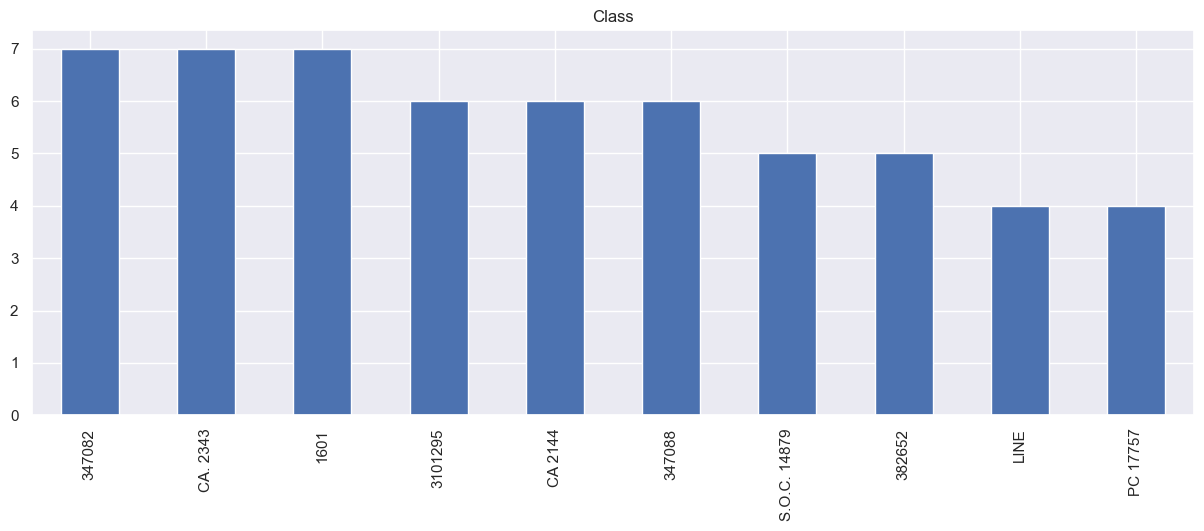

In [47]:
df3.Ticket.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Class")
#plt.ylabel('Number of Ages')
#plt.xlabel('Age')


The majority of passengers on the Titanic were third-class passengers.
The majority of passengers who died on the Titanic were third-class passengers.
More male passengers died than female passengers.
More children survived than adults.
Passengers who were in first class were more likely to survive than passengers who were in second or third class.
    
    
  **Conclusion**

By performing data cleaning and EDA on the Titanic dataset, we were able to identify a number of relationships between variables and patterns and trends in the data. This information can be used to gain a better understanding of the factors that influenced the survival of passengers on the Titanic.

## Building Machine Learning Model

### RandomForest

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


In [49]:

lE=LabelEncoder()
df3["Sex"]=lE.fit_transform(df3["Sex"])
df3["Embarked"]=lE.fit_transform(df3["Embarked"])


In [69]:
X=df3[["Pclass",'Age',"Sex",'SibSp','Parch',"Fare"]]
y=df3["Survived"]

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=0)


In [71]:

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [72]:
model.score(X_test,y_test)

0.780448717948718

In [73]:
model.score(X_train,y_train)

0.8202247191011236

In [75]:
y_pred = model.predict(X_test)


In [76]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))

Accuracy: 0.780448717948718
Precision: 0.694560669456067
Recall: 0.7217391304347827
f1_score: 0.7078891257995736
